In [1]:
## Data Source: https://www.kaggle.com/vijayuv/onlineretail

## Exploring Customer Data 

*In this project I'm using customer data to explore the data and apply some some customer segmentation techniques. More specifically, it will cover the following steps:*
1. Importing and cleaning the data.
2. EDA and calculating needed metrics.
3. Customer segmentation clustering using K-Means.
4. Customer lifetime value prediction.
5. Churn rate prediction.
6. Upcoming purchase prediction.
7. Prediction of sales.
8. Market response models.
9. Uplift modeling.
10. A|B testing. 

Project written in:
*Python*

This project was developed for educational purposes and stem from my eager to learn and practice my coding and data science skills. Throughout the project I was using a variety of sources to solve the problems I found along the way. Major credit to [**Barış Karaman**](https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b) for providing such a comprehensive guide and tips for this project.

## Data preperation and EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline
import seaborn as sns
import datetime

In [3]:
# importing the data and reading with encoding="cp1252" 
data = pd.read_csv("OnlineRetail.csv", encoding="cp1252")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [7]:
#quite some missing values 
data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# invoice date is not datetime 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
#majority of data is from the UK
# I'm going to focus on UK
data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [11]:
data_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)

In [12]:
data_uk.shape

(495478, 8)

In [13]:
# some missing values
data_uk.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [14]:
#dropping missing values
data_uk = data_uk.dropna()

In [15]:
# want to create a column with only month and year
data_uk['InvoiceYearMonth'] = data_uk['InvoiceDate'].dt.strftime('%Y-%m')

In [16]:
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [17]:
#Calculating revenue column
data_uk['Revenue'] = data_uk['UnitPrice'] * data_uk['Quantity']
#group by month
data_rev = data_uk.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
data_rev

,InvoiceYearMonth,Revenue
0,2010-12,483799.740
1,2011-01,351981.280
2,2011-02,348853.630
3,2011-03,456917.870
4,2011-04,376744.411
5,2011-05,525573.350
6,2011-06,472509.250
7,2011-07,461147.601
8,2011-08,477008.410
9,2011-09,776529.842


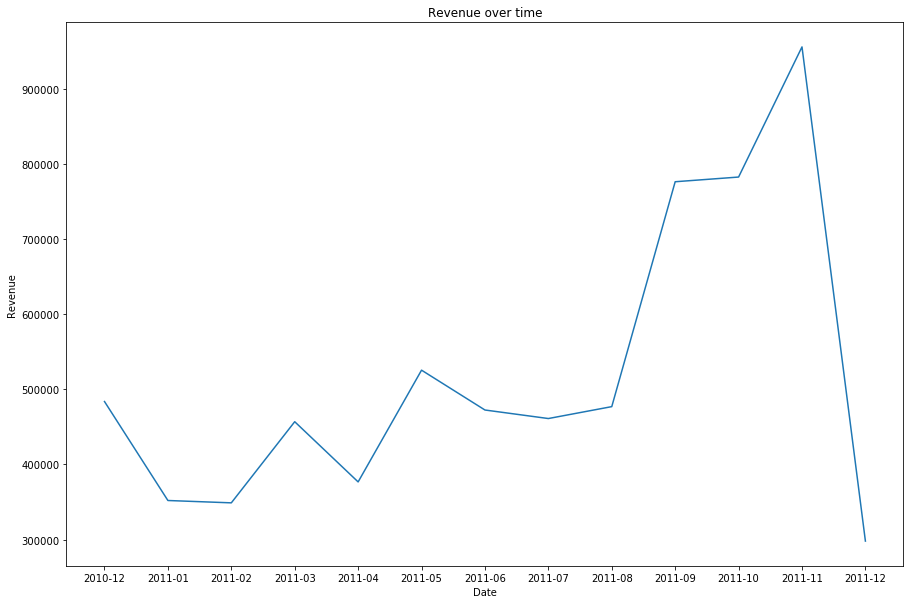

In [18]:
#revenue data for 2011-12 could be incomplete
x = data_rev['InvoiceYearMonth']
y = data_rev.Revenue


plt.figure(figsize=(15, 10))
plt.plot(x, y)
plt.title("Revenue over time")
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.xaxis={"type": "category"}
plt.show()

In [19]:
data_rev['MonthlyGrowth'] = data_rev['Revenue'].pct_change()

In [20]:
data_rev

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,2010-12,483799.740,NaN
1,2011-01,351981.280,-0.272465
2,2011-02,348853.630,-0.008886
3,2011-03,456917.870,0.309770
4,2011-04,376744.411,-0.175466
5,2011-05,525573.350,0.395040
6,2011-06,472509.250,-0.100964
7,2011-07,461147.601,-0.024045
8,2011-08,477008.410,0.034394
9,2011-09,776529.842,0.627916


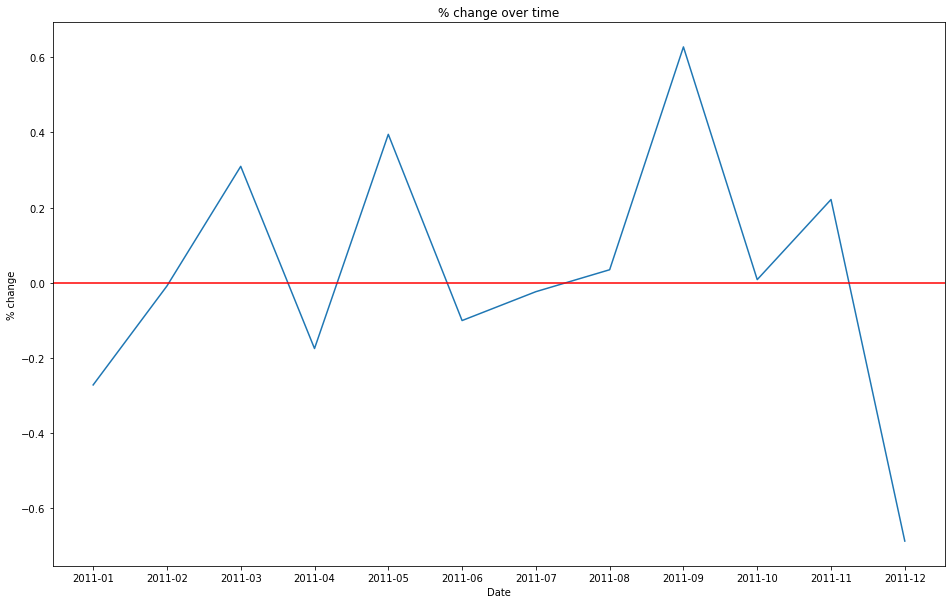

In [21]:
x = data_rev['InvoiceYearMonth']
y = data_rev['MonthlyGrowth']

plt.figure(figsize=(16, 10))
plt.plot(x, y)
plt.title("% change over time")
plt.ylabel('% change')
plt.xlabel('Date')
plt.axhline(y=0, c="r")
plt.show()

In [22]:
# calculating number of active users

data_uk_active = data_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

In [23]:
data_uk_active

,InvoiceYearMonth,CustomerID
0,2010-12,871
1,2011-01,684
2,2011-02,714
3,2011-03,923
4,2011-04,817
5,2011-05,985
6,2011-06,943
7,2011-07,899
8,2011-08,867
9,2011-09,1177


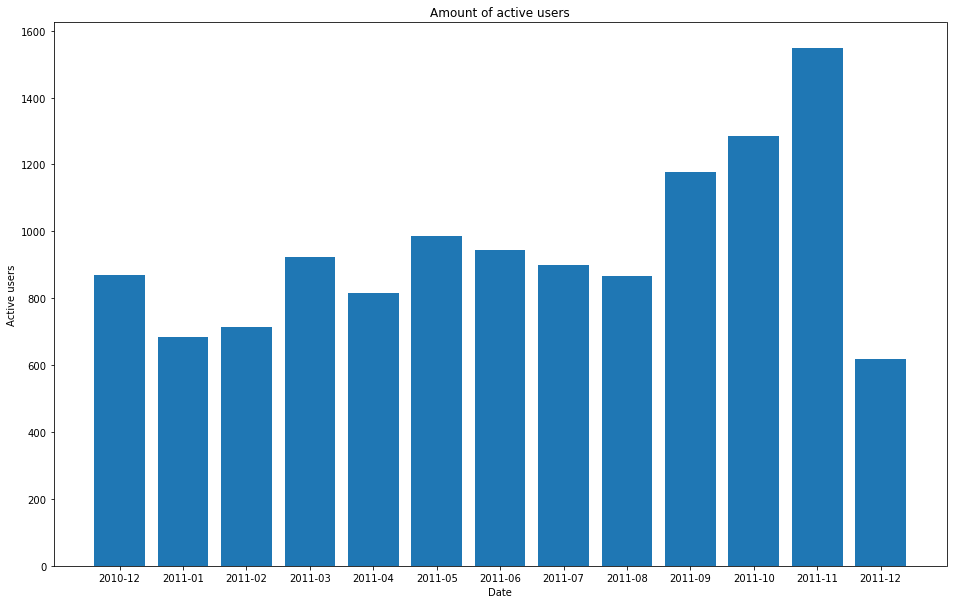

In [24]:
x = data_uk_active.InvoiceYearMonth
y = data_uk_active.CustomerID

plt.figure(figsize=(16, 10))
plt.bar(x, y)
plt.title("Amount of active users")
plt.ylabel('Active users')
plt.xlabel('Date')
plt.show()

In [25]:
data_uk_sales = data_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

In [26]:
data_uk_sales

,InvoiceYearMonth,Quantity
0,2010-12,252812
1,2011-01,198957
2,2011-02,211524
3,2011-03,272305
4,2011-04,247915
5,2011-05,296101
6,2011-06,274640
7,2011-07,297977
8,2011-08,301937
9,2011-09,447596


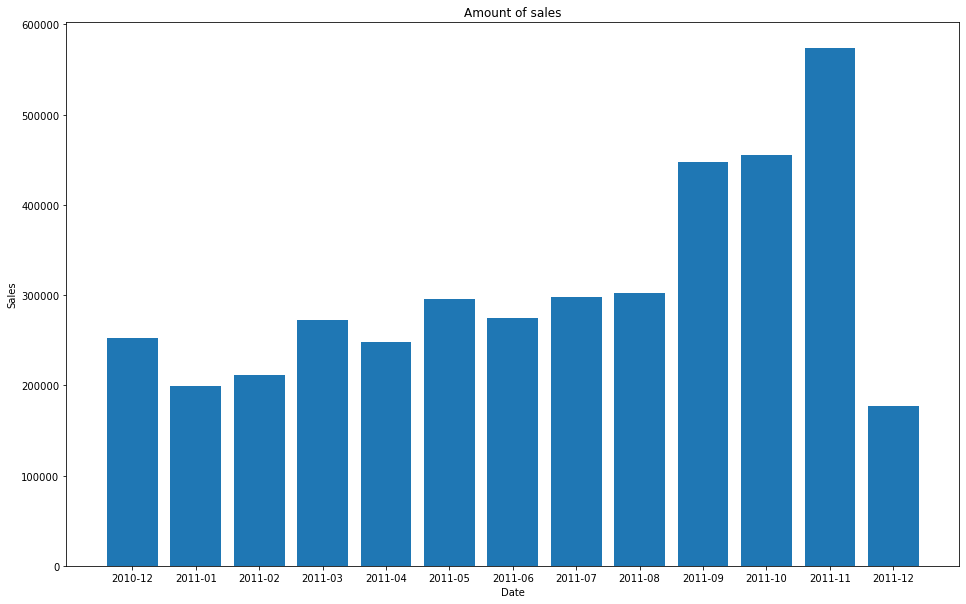

In [27]:
x = data_uk_sales.InvoiceYearMonth
y = data_uk_sales.Quantity

plt.figure(figsize=(16, 10))
plt.bar(x, y)
plt.title("Amount of sales")
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

In [28]:
data_uk_avgrev = data_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

In [29]:
data_uk_avgrev

,InvoiceYearMonth,Revenue
0,2010-12,19.717955
1,2011-01,18.784357
2,2011-02,19.263039
3,2011-03,18.583718
4,2011-04,17.639499
5,2011-05,20.420132
6,2011-06,19.448026
7,2011-07,19.079338
8,2011-08,20.192542
9,2011-09,21.372577


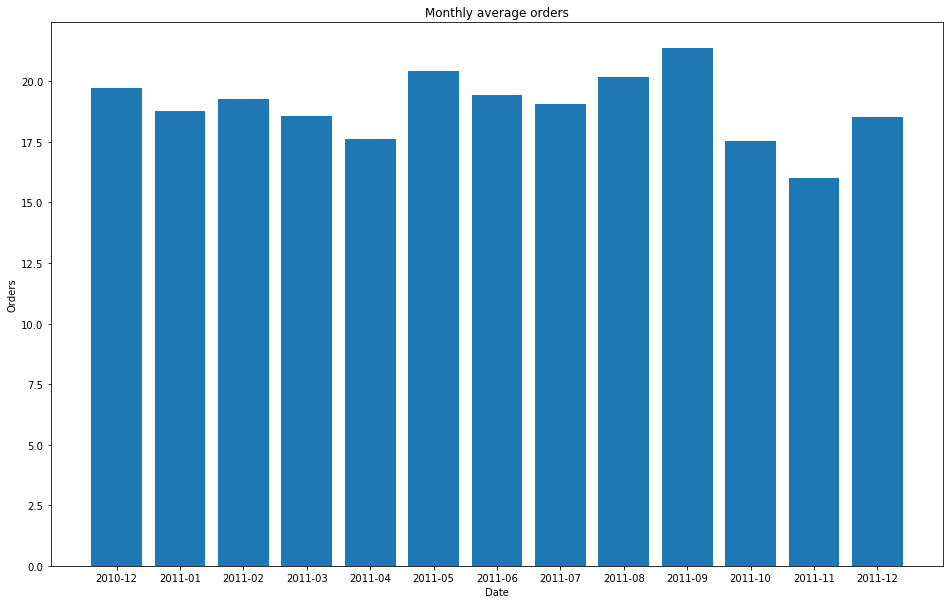

In [30]:
x = data_uk_avgrev.InvoiceYearMonth
y = data_uk_avgrev.Revenue

plt.figure(figsize=(16, 10))
plt.bar(x, y)
plt.title("Monthly average orders")
plt.ylabel('Orders')
plt.xlabel('Date')
plt.show()

In [31]:
#create a dataframe contaning CustomerID and first purchase date
data_uk_minpurchase = data_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
data_uk_minpurchase.columns = ['CustomerID','MinPurchaseDate']
data_uk_minpurchase['MinPurchaseYearMonth'] = data_uk_minpurchase['MinPurchaseDate'].dt.strftime('%Y-%m')

#merge datafframes into the one we want on CustomerID
data_uk = pd.merge(data_uk, data_uk_minpurchase, on='CustomerID')

#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
data_uk['UserType'] = 'New'
data_uk.loc[data_uk['InvoiceYearMonth']>data_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'



#calculate the Revenue per month for each user type
data_uk_type_revenue = data_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
data_uk_type_revenue = data_uk_type_revenue[(data_uk_type_revenue.InvoiceYearMonth != '2010-12') & (data_uk_type_revenue.InvoiceYearMonth != '2011-12')]


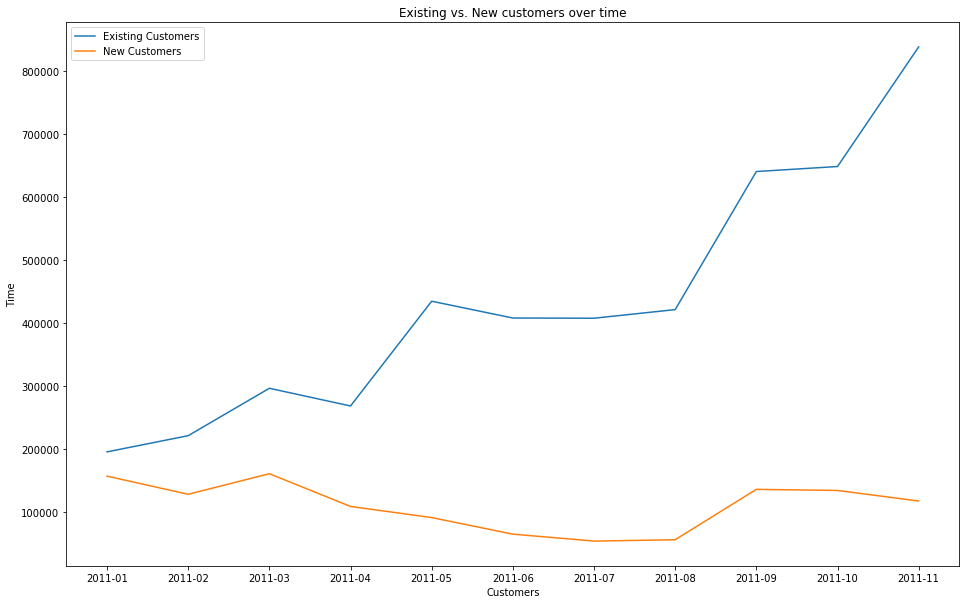

In [32]:
import matplotlib.pyplot as plt
#fig size
plt.figure(figsize=(16, 10))

# plot x1 and y1 for existing customers
x1 = data_uk_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth']
y1 = data_uk_type_revenue.query("UserType == 'Existing'")['Revenue']
plt.plot(x1, y1, label = "Existing Customers")

# plot x2 and y2 for new customers
x2 = data_uk_type_revenue.query("UserType == 'New'")['InvoiceYearMonth']
y2 = data_uk_type_revenue.query("UserType == 'New'")['Revenue']
plt.plot(x2, y2, label = "New Customers")

#define headers and labels
plt.xlabel('Customers')
plt.ylabel('Time')
plt.title('Existing vs. New customers over time')
plt.legend()
plt.show()

In [33]:
data_uk_user_ratio = data_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/data_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
data_uk_user_ratio = data_uk_user_ratio.reset_index()
data_uk_user_ratio = data_uk_user_ratio.dropna()

data_uk_user_ratio

,InvoiceYearMonth,CustomerID
1,2011-01,1.124224
2,2011-02,0.904000
3,2011-03,0.792233
4,2011-04,0.510166
5,2011-05,0.343793
6,2011-06,0.281250
7,2011-07,0.236589
8,2011-08,0.192572
9,2011-09,0.304878
10,2011-10,0.328852


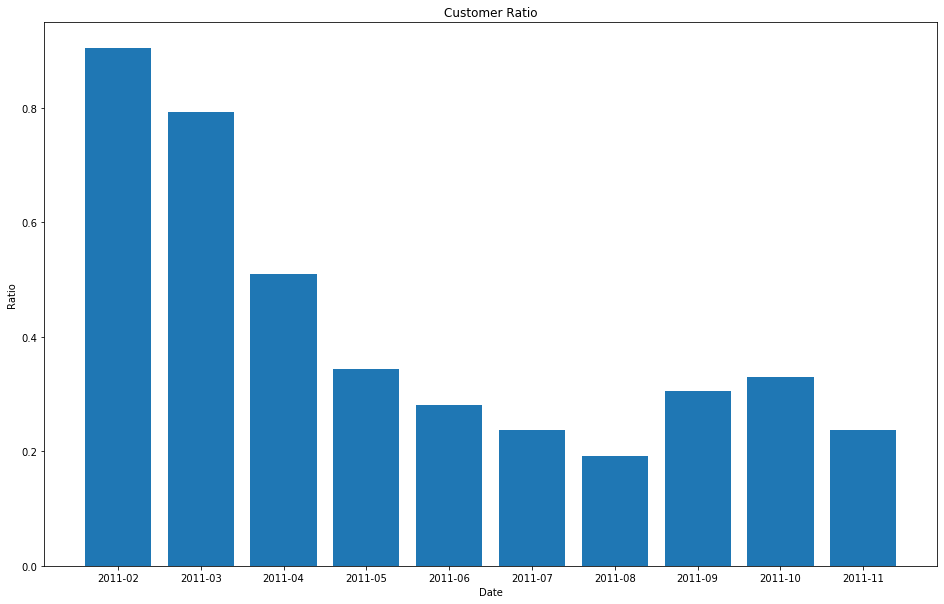

In [34]:
x = data_uk_user_ratio[(data_uk_user_ratio.InvoiceYearMonth > '2011-01') & (data_uk_user_ratio.InvoiceYearMonth < '2011-12')]['InvoiceYearMonth']
y = data_uk_user_ratio[(data_uk_user_ratio.InvoiceYearMonth > '2011-01') & (data_uk_user_ratio.InvoiceYearMonth < '2011-12')]['CustomerID']

plt.figure(figsize=(16, 10))
plt.bar(x, y)
plt.title("Customer Ratio")
plt.ylabel('Ratio')
plt.xlabel('Date')
plt.show()

In [35]:
data_uk_user_purchase = data_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
#in order to get months as a number I want to replace the "-"
data_uk_user_purchase.InvoiceYearMonth = [i.replace('-','') for i in data_uk_user_purchase.InvoiceYearMonth]
#create retention matrix with crosstab
data_uk_retention = pd.crosstab(data_uk_user_purchase['CustomerID'], data_uk_user_purchase['InvoiceYearMonth']).reset_index()

data_uk_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [36]:
data_uk_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


In [37]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = data_uk_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month) #need the date to be without string
    retention_data['TotalUserCount'] = data_uk_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = data_uk_retention[(data_uk_retention[selected_month]>0) & (data_uk_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
uk_retention = pd.DataFrame(retention_array)
uk_retention['RetentionRate'] = uk_retention['RetainedUserCount']/uk_retention['TotalUserCount']



In [38]:
uk_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


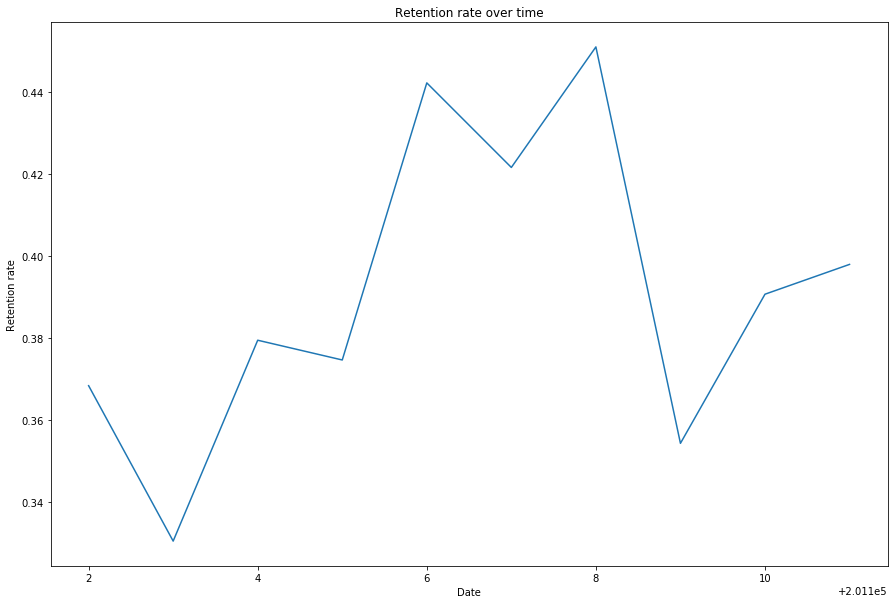

In [39]:
x = uk_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth']
y = uk_retention.query("InvoiceYearMonth<201112")['RetentionRate']

plt.figure(figsize=(15, 10))
plt.plot(x, y)
plt.title("Retention rate over time")
plt.ylabel('Retention rate')
plt.xlabel('Date')
plt.xaxis={"type": "category"}
plt.show()

In [40]:
#create a generic user dataframe to keep CustomerID and new segmentation scores
data_uk_user = pd.DataFrame(data_uk['CustomerID'].unique())
data_uk_user.columns = ['CustomerID']

#get the max purchase date for each customer and create a dataframe with it
data_uk_max_purchase = data_uk.groupby('CustomerID').InvoiceDate.max().reset_index()
data_uk_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
data_uk_max_purchase['Recency'] = (data_uk_max_purchase['MaxPurchaseDate'].max() - data_uk_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
data_uk_user = pd.merge(data_uk_user, data_uk_max_purchase[['CustomerID','Recency']], on='CustomerID')

data_uk_user.head()



,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


In [41]:
data_uk_user.describe()

,CustomerID,Recency
count,3950.000000,3950.000000
mean,15562.029367,90.778481
std,1576.848325,100.230349
min,12346.000000,0.000000
25%,14208.250000,16.000000
50%,15571.500000,49.000000
75%,16913.750000,142.000000
max,18287.000000,373.000000


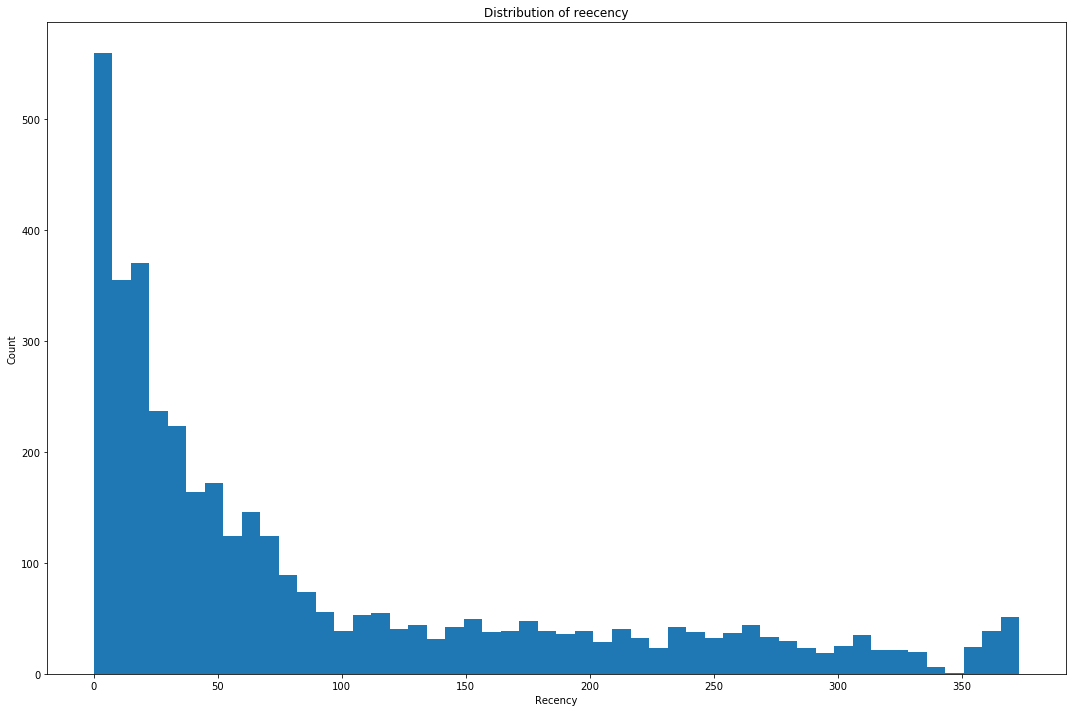

In [42]:
x = data_uk_user['Recency']


num_bins = 50

fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(x, num_bins)

ax.set_xlabel('Recency')
ax.set_ylabel('Count')
ax.set_title('Distribution of reecency')

fig.tight_layout()
plt.show()

## Customer segmentation KMeans clustering

<Figure size 1008x576 with 0 Axes>

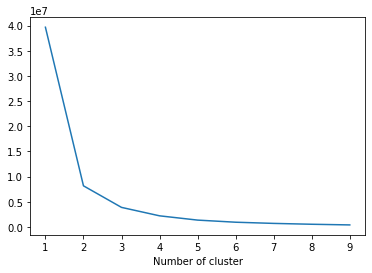

In [43]:
#defining the best number of clusters using elbow technique
from sklearn.cluster import KMeans

sse={}
data_recency = data_uk_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_recency)
    data_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.figure(figsize=(14, 8))
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [44]:
# best amount of clusters would be either 3 or possibly 4

In [45]:
kmeans = KMeans(n_clusters=4) #trying with 4 clusters
kmeans.fit(data_uk_user[['Recency']])
data_uk_user['RecencyCluster'] = kmeans.predict(data_uk_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

data_uk_user = order_cluster('RecencyCluster', 'Recency',data_uk_user,False)

In [46]:
data_uk_user.groupby('RecencyCluster').describe()

CustomerID                                                \
                    count          mean          std      min       25%   
RecencyCluster                                                            
0                   478.0  15568.018828  1589.575479  12346.0  14178.25   
1                   568.0  15644.091549  1589.464350  12821.0  14317.75   
2                   954.0  15490.784067  1562.774654  12822.0  14078.25   
3                  1950.0  15571.513333  1576.658977  12747.0  14228.25   

                                          Recency                         \
                    50%      75%      max   count        mean        std   
RecencyCluster                                                             
0               15519.0  16856.0  18280.0   478.0  304.393305  41.183489   
1               15651.5  17041.5  18281.0   568.0  184.625000  31.753602   
2               15532.0  16786.0  18278.0   954.0   77.679245  22.850898   
3               15570.5  16952.0  18287.0  1950.0   17.488205  13.237058   

                                                     
                  min     25%    50%     75%    max  
RecencyCluster                                       
0               245.0  266.25  300.0  336.00  373.0  
1               132.0  156.75  184.0  211.25  244.0  
2                48.0   59.00   72.5   93.00  131.0  
3                 0.0    6.00   16.0   28.00   47.0

In [47]:
data_frequency = data_uk.groupby('CustomerID').InvoiceDate.count().reset_index()
data_frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
data_uk_user = pd.merge(data_uk_user, data_frequency, on='CustomerID')


In [48]:
data_uk_user

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,0,312
1,15100.0,329,0,6
2,18074.0,373,0,13
3,16250.0,260,0,24
4,13747.0,373,0,1
...,...,...,...,...
3945,15942.0,133,1,14
3946,14143.0,133,1,7
3947,16147.0,133,1,22
3948,15149.0,133,1,23


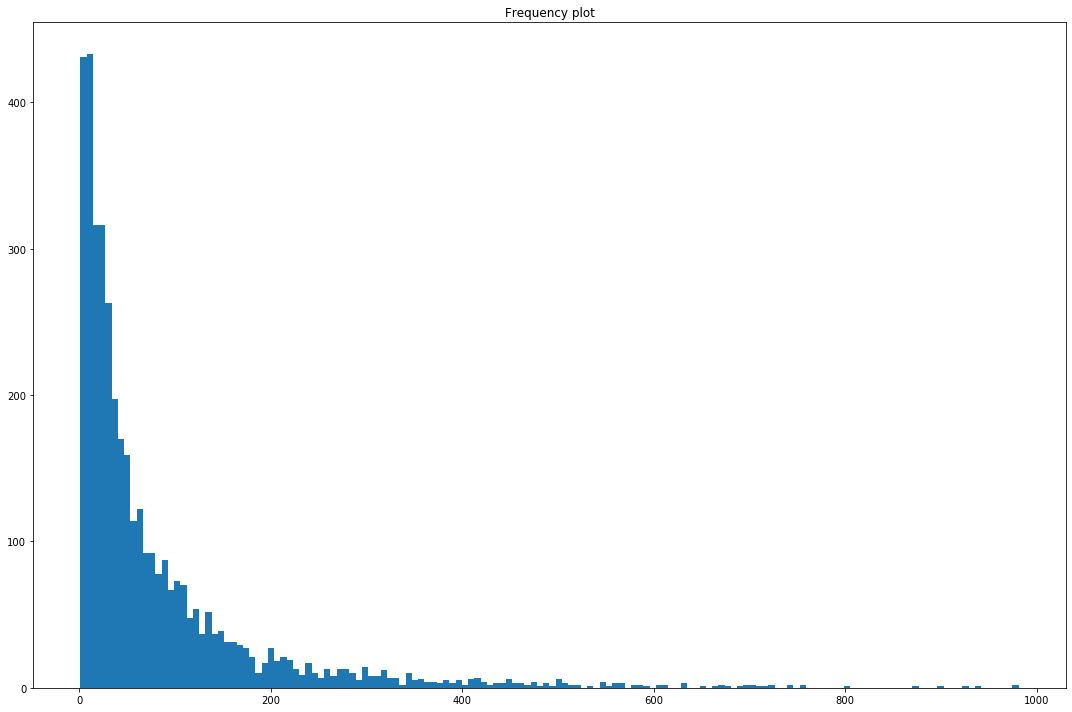

In [49]:
x = data_uk_user.query('Frequency < 1000')['Frequency']

num_bins = 150

fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(x, num_bins)

#ax.set_xlabel('Recency')
#ax.set_ylabel('Count')
ax.set_title('Frequency plot')

fig.tight_layout()
plt.show()

In [50]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_uk_user[['Frequency']])
data_uk_user['FrequencyCluster'] = kmeans.predict(data_uk_user[['Frequency']])

#order the frequency cluster
data_uk_user = order_cluster('FrequencyCluster', 'Frequency',data_uk_user,True)

#see details of each cluster
data_uk_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


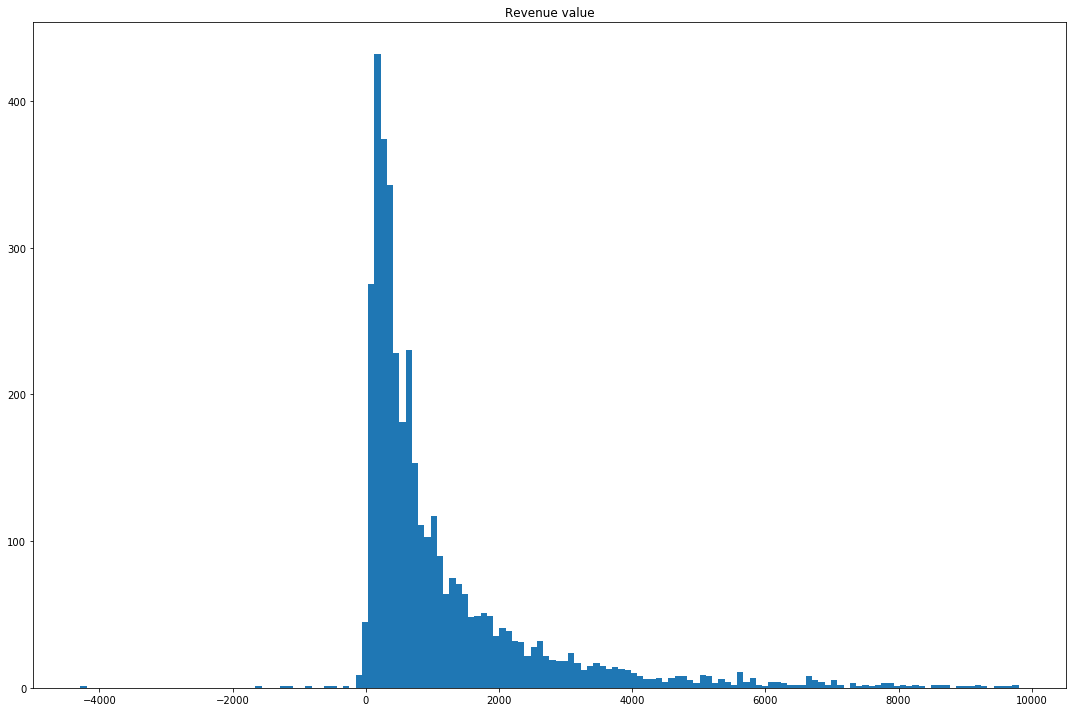

In [51]:
#calculate revenue for each customer
data_uk['Revenue'] = data_uk['UnitPrice'] *data_uk['Quantity']
data_revenue = data_uk.groupby('CustomerID').Revenue.sum().reset_index()

#merge it with our main dataframe
data_uk_user = pd.merge(data_uk_user, data_revenue, on='CustomerID')

x = data_uk_user.query('Revenue < 10000')['Revenue']

num_bins = 150

fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(x, num_bins)

#ax.set_xlabel('Recency')
#ax.set_ylabel('Count')
ax.set_title('Revenue value')

fig.tight_layout()
plt.show()

In [52]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_uk_user[['Revenue']])
data_uk_user['RevenueCluster'] = kmeans.predict(data_uk_user[['Revenue']])


#order the cluster numbers
data_uk_user = order_cluster('RevenueCluster', 'Revenue',data_uk_user,True)

#show details of the dataframe
data_uk_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


In [53]:
#calculate overall score and use mean() to see details
data_uk_user['OverallScore'] = data_uk_user['RecencyCluster'] + data_uk_user['FrequencyCluster'] + data_uk_user['RevenueCluster']
data_uk_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,304.584388,21.995781,303.339705
1,185.362989,32.596085,498.087546
2,78.991304,46.963043,868.082991
3,20.689610,68.419590,1091.416414
4,14.892617,271.755034,3607.097114
5,9.662162,373.290541,9136.946014
6,7.740741,876.037037,22777.914815
7,1.857143,1272.714286,103954.025714
8,1.333333,5917.666667,42177.930000


In [54]:
data_uk_user['Segment'] = 'Low-Value'
data_uk_user.loc[data_uk_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
data_uk_user.loc[data_uk_user['OverallScore']>4,'Segment'] = 'High-Value' 

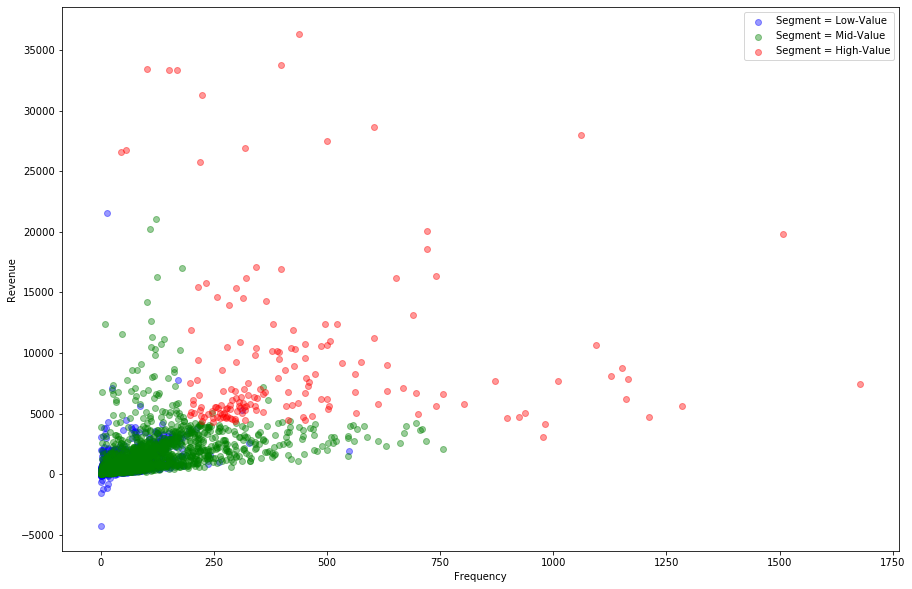

In [55]:
#Revenue vs Frequency
rev_graph = data_uk_user.query("Revenue < 50000 and Frequency < 2000")

#getting low_val values
low_val_x = rev_graph.query("Segment == 'Low-Value'")['Frequency']
low_val_y = rev_graph.query("Segment == 'Low-Value'")['Revenue']

#getting mid_val values
mid_val_x = rev_graph.query("Segment == 'Mid-Value'")['Frequency']
mid_val_y = rev_graph.query("Segment == 'Mid-Value'")['Revenue']

#getting high_val values
high_val_x = rev_graph.query("Segment == 'High-Value'")['Frequency']
high_val_y = rev_graph.query("Segment == 'High-Value'")['Revenue']

#defining colors
colors = ['blue','green','red']

plt.figure(figsize=(15, 10))
plt.scatter(low_val_x, low_val_y, color = colors[0], label = "Segment = Low-Value", alpha=0.4)
plt.scatter(mid_val_x, mid_val_y, color = colors[1], label = "Segment = Mid-Value", alpha=0.4)
plt.scatter(high_val_x, high_val_y, color = colors[2], label = "Segment = High-Value", alpha=0.4)
plt.xlabel('Frequency')
plt.ylabel('Revenue')
plt.legend()
plt.show()

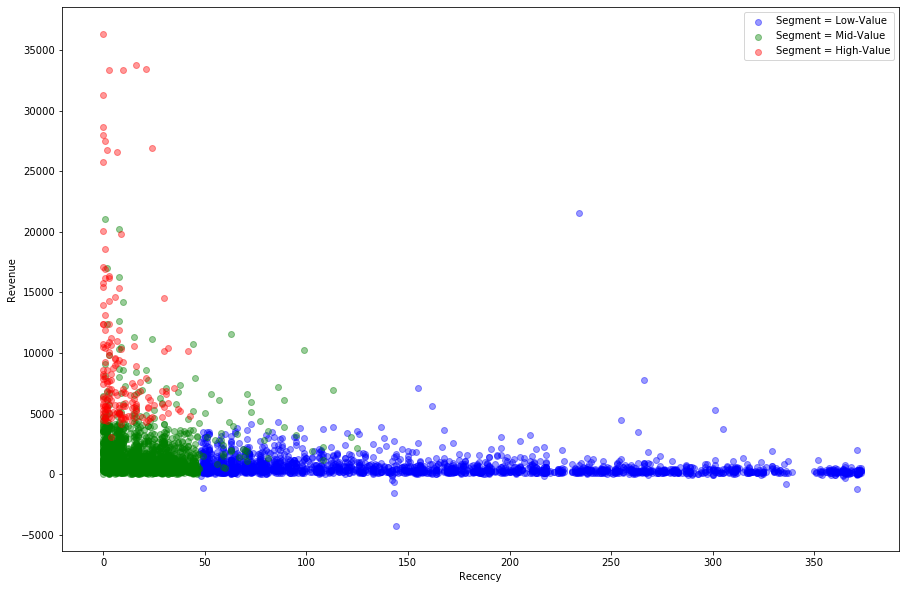

In [56]:
#Revenue vs Recency
rev_graph = data_uk_user.query("Revenue < 50000 and Frequency < 2000")

#getting low_val values
low_val_x = rev_graph.query("Segment == 'Low-Value'")['Recency']
low_val_y = rev_graph.query("Segment == 'Low-Value'")['Revenue']

#getting mid_val values
mid_val_x = rev_graph.query("Segment == 'Mid-Value'")['Recency']
mid_val_y = rev_graph.query("Segment == 'Mid-Value'")['Revenue']

#getting high_val values
high_val_x = rev_graph.query("Segment == 'High-Value'")['Recency']
high_val_y = rev_graph.query("Segment == 'High-Value'")['Revenue']

#defining colors
colors = ['blue','green','red']

plt.figure(figsize=(15, 10))
plt.scatter(low_val_x, low_val_y, color = colors[0], label = "Segment = Low-Value", alpha=0.4)
plt.scatter(mid_val_x, mid_val_y, color = colors[1], label = "Segment = Mid-Value", alpha=0.4)
plt.scatter(high_val_x, high_val_y, color = colors[2], label = "Segment = High-Value", alpha=0.4)
plt.xlabel('Recency')
plt.ylabel('Revenue')
plt.legend()
plt.show()

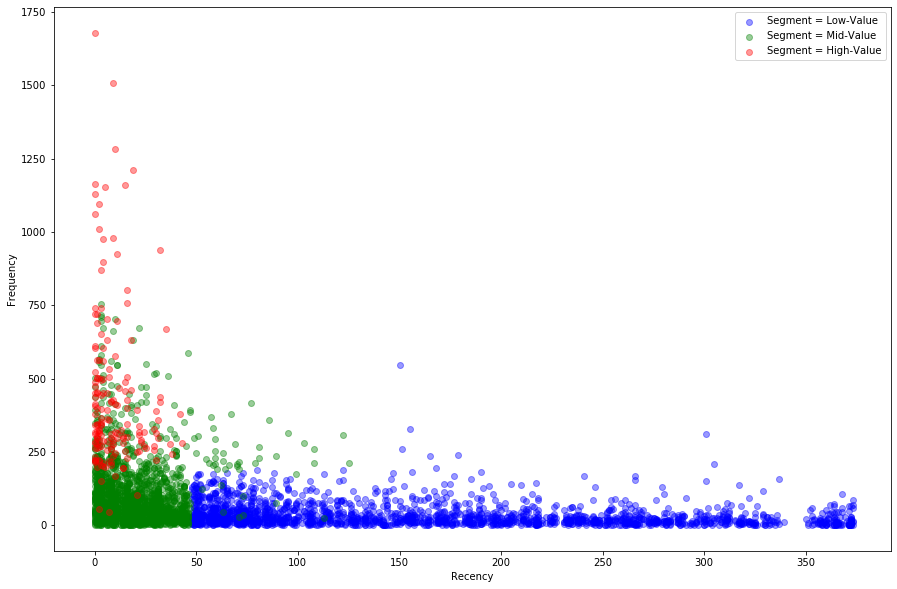

In [57]:
# Recency vs Frequency
rev_graph = data_uk_user.query("Revenue < 50000 and Frequency < 2000")

#getting low_val values
low_val_x = rev_graph.query("Segment == 'Low-Value'")['Recency']
low_val_y = rev_graph.query("Segment == 'Low-Value'")['Frequency']

#getting mid_val values
mid_val_x = rev_graph.query("Segment == 'Mid-Value'")['Recency']
mid_val_y = rev_graph.query("Segment == 'Mid-Value'")['Frequency']

#getting high_val values
high_val_x = rev_graph.query("Segment == 'High-Value'")['Recency']
high_val_y = rev_graph.query("Segment == 'High-Value'")['Frequency']

#defining colors
colors = ['blue','green','red']

plt.figure(figsize=(15, 10))
plt.scatter(low_val_x, low_val_y, color = colors[0], label = "Segment = Low-Value", alpha=0.4)
plt.scatter(mid_val_x, mid_val_y, color = colors[1], label = "Segment = Mid-Value", alpha=0.4)
plt.scatter(high_val_x, high_val_y, color = colors[2], label = "Segment = High-Value", alpha=0.4)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [58]:
#High Value: Improve Retention
#Mid Value: Improve Retention + Increase Frequency
#Low Value: Increase Frequency

In [59]:
data_uk_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,301,0,312,1,5288.63,1,2,Low-Value
1,14688.0,7,3,359,1,5107.38,1,5,High-Value
2,13767.0,1,3,399,1,16945.71,1,5,High-Value
3,15513.0,30,3,314,1,14520.08,1,5,High-Value
4,14849.0,21,3,392,1,7904.28,1,5,High-Value
...,...,...,...,...,...,...,...,...,...
3945,12748.0,0,3,4642,3,29072.10,2,8,High-Value
3946,17841.0,1,3,7983,3,40340.78,2,8,High-Value
3947,14096.0,3,3,5128,3,57120.91,2,8,High-Value
3948,17450.0,7,3,351,1,187482.17,3,7,High-Value


# Customer Life Time Value

### Equation used

Customer lifetime Value is calculated in the following way:

*Lifetime Value: Total Gross Revenue - Total Cost*

Since there is no cost associated with the dataset, revenue will be the indicator all alone.

In [60]:
# define a new dataframe to perform my CLTV machine learning algorithm
data_cltv = pd.read_csv("OnlineRetail.csv", encoding="cp1252")
data_cltv['InvoiceDate'] = pd.to_datetime(data_cltv['InvoiceDate'])
data_cltv = data_cltv.query("Country=='United Kingdom'").reset_index(drop=True)
data_cltv = data_cltv.dropna()

In [61]:
from datetime import datetime, timedelta,date

#splitting the data into two dataframes
#one for 3 months period and one for 6 months period
cltv_3m = data_cltv[(data_cltv.InvoiceDate < date(2011,6,1)) & (data_cltv.InvoiceDate >= date(2011,3,1))].reset_index(drop=True)
cltv_6m = data_cltv[(data_cltv.InvoiceDate >= date(2011,6,1)) & (data_cltv.InvoiceDate < date(2011,12,1))].reset_index(drop=True)

#create tx_user for assigning clustering
cltv_user = pd.DataFrame(cltv_3m['CustomerID'].unique())
cltv_user.columns = ['CustomerID']

/Users/adamsvensson/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """
/Users/adamsvensson/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [62]:
#calculate recency score
cltv_max_purchase = cltv_3m.groupby('CustomerID').InvoiceDate.max().reset_index()
cltv_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
cltv_max_purchase['Recency'] = (cltv_max_purchase['MaxPurchaseDate'].max() - cltv_max_purchase['MaxPurchaseDate']).dt.days
cltv_user = pd.merge(cltv_user, cltv_max_purchase[['CustomerID','Recency']], on='CustomerID')

#kmeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(cltv_user[['Recency']])
cltv_user['RecencyCluster'] = kmeans.predict(cltv_user[['Recency']])

# using order_cluster function created before
cltv_user = order_cluster('RecencyCluster', 'Recency', cltv_user, False)

In [63]:
#calculating frequency
cltv_frequency = cltv_3m.groupby('CustomerID').InvoiceDate.count().reset_index()
cltv_frequency.columns = ['CustomerID','Frequency']
cltv_user = pd.merge(cltv_user, cltv_frequency, on='CustomerID')

#kmeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(cltv_user[['Frequency']])
cltv_user['FrequencyCluster'] = kmeans.predict(cltv_user[['Frequency']])

# using order_cluster function created before
cltv_user = order_cluster('FrequencyCluster', 'Frequency', cltv_user, True)

In [64]:
#calcuate revenue score
cltv_3m['Revenue'] = cltv_3m['UnitPrice'] * cltv_3m['Quantity']
cltv_revenue = cltv_3m.groupby('CustomerID').Revenue.sum().reset_index()
cltv_user = pd.merge(cltv_user, cltv_revenue, on='CustomerID')

#kmeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(cltv_user[['Revenue']])
cltv_user['RevenueCluster'] = kmeans.predict(cltv_user[['Revenue']])

# using order_cluster function created before
cltv_user = order_cluster('RevenueCluster', 'Revenue', cltv_user, True)

In [65]:
#overall scoring for the 3m segment
cltv_user['OverallScore'] = cltv_user['RecencyCluster'] + cltv_user['FrequencyCluster'] + cltv_user['RevenueCluster']

#defining the segments low,mid,high based on overall scores
cltv_user['Segment'] = 'Low-Value'
cltv_user.loc[cltv_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
cltv_user.loc[cltv_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [66]:
cltv_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value
1,15194.0,6,3,64,0,1439.02,0,3,Mid-Value
2,18044.0,5,3,57,0,808.96,0,3,Mid-Value
3,18075.0,12,3,35,0,638.12,0,3,Mid-Value
4,15241.0,0,3,64,0,947.55,0,3,Mid-Value
...,...,...,...,...,...,...,...,...,...
1835,17511.0,14,3,199,1,17307.53,2,6,High-Value
1836,16684.0,13,3,73,1,15263.96,2,6,High-Value
1837,15311.0,4,3,522,2,16309.61,2,7,High-Value
1838,13089.0,5,3,452,2,11757.87,2,7,High-Value


In [67]:
# creating revenue for 6m df
cltv_6m['Revenue'] = cltv_6m['UnitPrice'] * cltv_6m['Quantity']
cltv_user_6m = cltv_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
cltv_user_6m.columns = ['CustomerID','m6_Revenue']

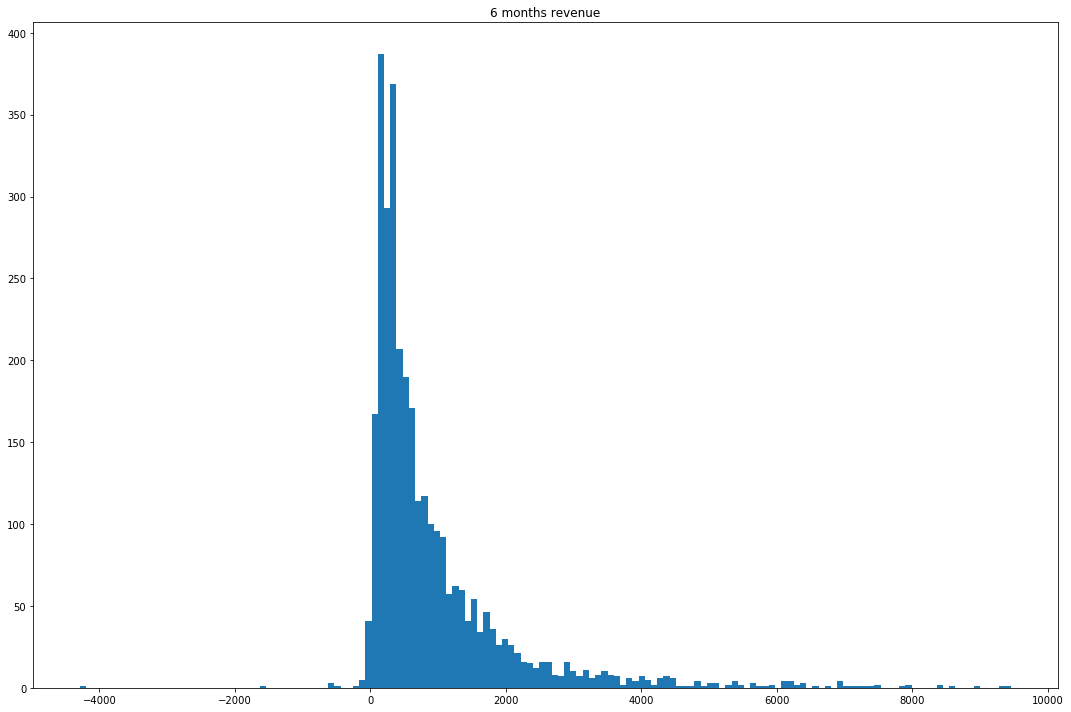

In [68]:
x = cltv_user_6m.query('m6_Revenue < 10000')['m6_Revenue']

num_bins = 150

fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(x, num_bins)

#ax.set_xlabel('Recency')
#ax.set_ylabel('Count')
ax.set_title('6 months revenue')

fig.tight_layout()
plt.show()

In [69]:
#negative customer lifetime value for some customers
#quite some outliers

In [70]:
#merging 3 month and 6 month dataframes together

cltv_merge = pd.merge(cltv_user, cltv_user_6m, on='CustomerID', how='left')
cltv_merge = cltv_merge.fillna(0)

cltv_graph = cltv_merge.query("m6_Revenue < 30000")

In [71]:
cltv_graph

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value,0.00
1,15194.0,6,3,64,0,1439.02,0,3,Mid-Value,3232.20
2,18044.0,5,3,57,0,808.96,0,3,Mid-Value,991.54
3,18075.0,12,3,35,0,638.12,0,3,Mid-Value,1322.75
4,15241.0,0,3,64,0,947.55,0,3,Mid-Value,791.04
...,...,...,...,...,...,...,...,...,...,...
1832,16422.0,4,3,129,1,10348.13,2,6,High-Value,16756.31
1834,13798.0,4,3,122,1,11105.20,2,6,High-Value,12913.99
1837,15311.0,4,3,522,2,16309.61,2,7,High-Value,29313.15
1838,13089.0,5,3,452,2,11757.87,2,7,High-Value,26013.37


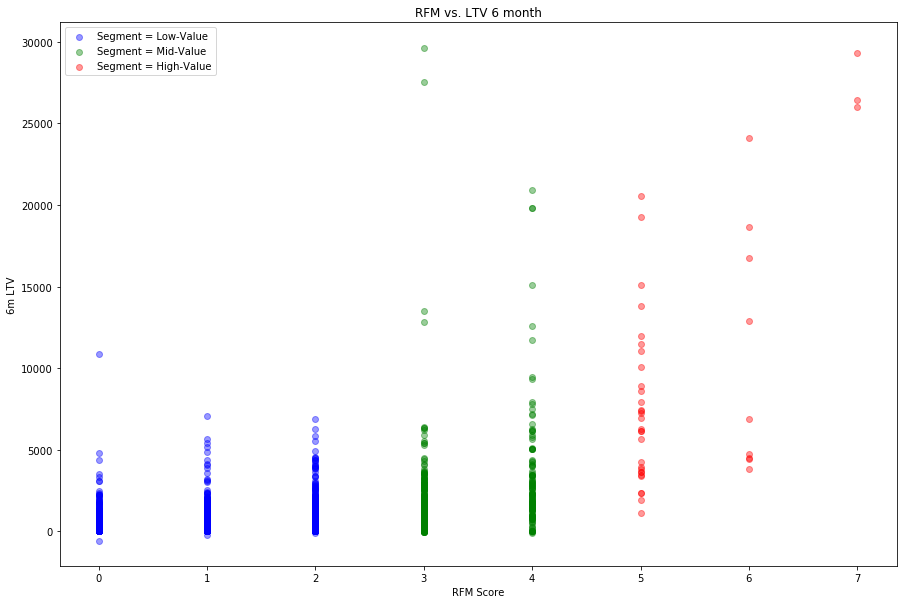

In [72]:
#low values
low_val_x = cltv_graph.query("Segment == 'Low-Value'")['OverallScore']
low_val_y = cltv_graph.query("Segment == 'Low-Value'")['m6_Revenue']

#mid values
mid_val_x = cltv_graph.query("Segment == 'Mid-Value'")['OverallScore']
mid_val_y = cltv_graph.query("Segment == 'Mid-Value'")['m6_Revenue']

#high values
high_val_x = cltv_graph.query("Segment == 'High-Value'")['OverallScore']
high_val_y = cltv_graph.query("Segment == 'High-Value'")['m6_Revenue']

#defining colors
colors = ['blue','green','red']

plt.figure(figsize=(15, 10))
plt.scatter(low_val_x, low_val_y, color = colors[0], label = "Segment = Low-Value", alpha=0.4)
plt.scatter(mid_val_x, mid_val_y, color = colors[1], label = "Segment = Mid-Value", alpha=0.4)
plt.scatter(high_val_x, high_val_y, color = colors[2], label = "Segment = High-Value", alpha=0.4)
plt.xlabel('RFM Score')
plt.ylabel('6m LTV')
plt.title('RFM vs. LTV 6 month')
plt.legend()
plt.show()

In [73]:
# There seems to be a positive correlation between RFM score and LTV
# As RFM score gets higher, the higher the LTV seems to be

## Building machine learning model to predict Customer LTV

In [74]:
# before applying my model I want to segment the LTV into three clusters based on rev value:
# Low value
# Mid value
# High value

#remove outliers that we saw previously 
cltv_merge = cltv_merge[cltv_merge['m6_Revenue']<cltv_merge['m6_Revenue'].quantile(0.99)]

#creating 3 clusters Low-Mid-High
kmeans = KMeans(n_clusters=3)
kmeans.fit(cltv_merge[['m6_Revenue']])
cltv_merge['LTVCluster'] = kmeans.predict(cltv_merge[['m6_Revenue']])

#order cluster number based on LTV
cltv_merge = order_cluster('LTVCluster', 'm6_Revenue', cltv_merge, True)

#creatinga new cluster dataframe
cltv_cluster = cltv_merge.copy()

#see details of the clusters
cltv_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1394.0,396.137189,419.891843,-609.40,0.000,294.220,682.4300,1429.87
1,371.0,2492.794933,937.341566,1445.31,1731.980,2162.930,3041.9550,5287.39
2,56.0,8222.565893,2983.572030,5396.44,6151.435,6986.545,9607.3225,16756.31


In [82]:
cltv_cluster.LTVCluster.value_counts()

0    1394
1     371
2      56
Name: LTVCluster, dtype: int64

In [75]:
# Cluster 2 is the most attrictive cluster with highest average revenue value 
# data is also a bit unbalanced since we have way more in class 0 than 1 and 2

In [83]:
# balance dataset using upsample method
# after fitting models on upsampled data I didn't see any better performance, rather the opposite.
# I will stick with normal data
from sklearn.utils import resample

# Separate majority and minority classes
df_low = cltv_cluster[cltv_cluster.LTVCluster==0]
df_mid = cltv_cluster[cltv_cluster.LTVCluster==1]
df_high = cltv_cluster[cltv_cluster.LTVCluster==2]

# Upsampling mid class
df_mid_upsampled = resample(df_mid, 
                            replace=True,     
                            n_samples=1394,
                            random_state=42) 

# Upsampling high class
df_high_upsampled = resample(df_high, 
                            replace=True,     
                            n_samples=1394,
                            random_state=42) 
 
    
concat_frames = [df_low, df_mid_upsampled, df_high_upsampled]
df_upsampled = pd.concat(concat_frames)
 
# Display new class counts
df_upsampled.LTVCluster.value_counts()

2    1394
1    1394
0    1394
Name: LTVCluster, dtype: int64

In [90]:
#convert categorical columns to numerical
#cltv_class = pd.get_dummies(df_upsampled)
cltv_class = pd.get_dummies(cltv_cluster)

#calculate and show correlations
corr_matrix = cltv_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster            1.000000
m6_Revenue            0.845933
Revenue               0.600491
RevenueCluster        0.463930
OverallScore          0.373231
FrequencyCluster      0.366366
Frequency             0.359601
Segment_High-Value    0.353218
RecencyCluster        0.236899
Segment_Mid-Value     0.166854
CustomerID           -0.028401
Recency              -0.237249
Segment_Low-Value    -0.266008
Name: LTVCluster, dtype: float64

In [91]:
#defining my x and y
X = cltv_class.drop(['LTVCluster','m6_Revenue'],axis=1) # X = 11 columns
y = cltv_class['LTVCluster'] # y = target variable

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
# model number 1 SVM
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

clf_model = svm.SVC(decision_function_shape='ovo', kernel='linear')

clf_result = clf_model.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
       .format(clf_model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
       .format(clf_model.score(X_test[X_train.columns], y_test)))

y_pred = clf_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       348
           1       0.58      0.33      0.42        95
           2       0.67      0.46      0.55        13

    accuracy                           0.81       456
   macro avg       0.70      0.58      0.62       456
weighted avg       0.79      0.81      0.79       456



In [ ]:
#TODO
# apply grid search for my models
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [94]:
# second model random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(max_depth=4, random_state=42)

rf_results = rf_classifier.fit(X_train, y_train)

print('Accuracy of random forest classifier on training set: {:.2f}'
       .format(rf_classifier.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set: {:.2f}'
       .format(rf_classifier.score(X_test[X_train.columns], y_test)))

y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of random forest classifier on training set: 0.82
Accuracy of random forest classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       348
           1       0.60      0.26      0.36        95
           2       0.64      0.69      0.67        13

    accuracy                           0.80       456
   macro avg       0.69      0.64      0.64       456
weighted avg       0.78      0.80      0.77       456



In [95]:
# third model naive bayes
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()

gnb_results = gnb_classifier.fit(X_train, y_train)

print('Accuracy of naive bayes classifier on training set: {:.2f}'
       .format(gnb_classifier.score(X_train, y_train)))
print('Accuracy of naive bayes classifier on test set: {:.2f}'
       .format(gnb_classifier.score(X_test[X_train.columns], y_test)))

y_pred = gnb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of naive bayes classifier on training set: 0.79
Accuracy of naive bayes classifier on test set: 0.78
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       348
           1       0.49      0.28      0.36        95
           2       0.47      0.69      0.56        13

    accuracy                           0.78       456
   macro avg       0.60      0.63      0.60       456
weighted avg       0.76      0.78      0.76       456

